In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive
#!rm -rf crop

Mounted at /content/drive
/content/drive/MyDrive


# **For Bounding Box**

In [ ]:
import numpy as np # linear algebra
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt # to show images
from PIL import Image # to read images
from google.colab.patches import cv2_imshow
import os
import glob
import cv2

In [ ]:
root_images="IDD/JPEGImages"
root_annots="IDD/Annotations"
all_images=os.listdir("IDD/JPEGImages")

In [ ]:
def bounding_box(image):

  bpath=root_annots+"/"+str(image.replace('.jpg', '.xml'))
  bbox = []
  
  tree = ET.parse(bpath)
  root = tree.getroot()
  objects = root.findall('object')
  xmin = ymin = xmax = ymax = 0
  
  for o in objects:
    bndbox = o.find('bndbox') # reading bound box
    xmin = int(float(bndbox.find('xmin').text))
    ymin = int(float(bndbox.find('ymin').text))
    xmax = int(float(bndbox.find('xmax').text))
    ymax = int(float(bndbox.find('ymax').text))
    bbox.append([xmin, ymin, xmax, ymax])
  return bbox

# **Detection for Red(Headlight)**

In [ ]:
def detect_red(img, Threshold=0.02):

    desired_dim = (30, 90)  # width, height
    #img = cv2.resize(np.array(img), desired_dim, interpolation=cv2.INTER_LINEAR)
    #img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    # Compare the percentage of red values
    rate = np.count_nonzero(mask) / (desired_dim[0] * desired_dim[1])

    if rate > Threshold:
        return True
    else:
        return False

# **Detection for White(Taillight)**

In [ ]:
def detect_white(img, Threshold=0.01):

    desired_dim = (20, 90) # width, height
    #img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # White mask
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(img, light_white, dark_white)

    # Compare the percentage of white values
    rate_white = np.count_nonzero(mask_white) / (desired_dim[0] * desired_dim[1])

    if rate_white > Threshold:
        return 1
    else:
        return 0

# **Light Color Name**

In [ ]:
def vehicle_light_detect(img):
  if((!detect_white(img) && (!detect_red(img)):
    cv2.putText(image_np, 'Lights Off', (15, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
  else:
    if(detect_red(img)):
      cv2.putText(image_np, 'Taillight On', (15, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    else:
      cv2.putText(image_np, 'Headlight On', (15, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)

# **Cropping, Detection, and Naming**

In [ ]:
def crop_image_put_text(image):
  #for image in all_images:  
  n = 0
  bbox=bounding_box(image)
  path = "/content/drive/MyDrive/crop/"
  for box in bbox:
    #print(box)
    #im=Image.open(os.path.join(root_images,image))
    im = im.crop(box)
    #im.save(path + image.replace('.jpg', '') + str(n) + ".jpg")
    #im.save(f"{path}" + image.replace('.jpg', '') + str(n) + ".jpg")
    n+=1
print(image)
#im=Image.open(os.path.join(root_images,image))
#print(no)
#no+=1

  #path = "/content/crop/"
  #for i in bbox:
  #print(bbox)
  #path_cr = os.path.join("/content/Whole_Cropped/" , "no" + '.jpg')
    #print(i)
    #im=im.crop(i)
    #path = os.path.join('/content/crop/', str(no) + '.jpg')
    #cv2.imwrite('/content/crop/%d.jpg'% no, im)
    #im = np.array(im, dtype=np.uint8)
    #im.save(path + str(no) + ".jpg")
    #print(no)
    #no+=1'''

[1441, 871, 1532, 937]
[1339, 601, 1391, 663]
[73, 806, 243, 871]
[737, 630, 804, 692]
[1045, 622, 1125, 690]
[1173, 694, 1283, 800]
[1559, 586, 1632, 669]
[667, 703, 764, 815]
[306, 669, 441, 742]
[81, 667, 121, 742]
[1194, 563, 1240, 595]
[964, 607, 1005, 653]
[1624, 792, 1810, 920]
[571, 551, 611, 605]
[768, 530, 833, 595]
[1537, 545, 1588, 590]
[1325, 551, 1375, 599]
[845, 736, 932, 790]
[1074, 487, 1098, 520]
[1157, 483, 1186, 516]
[1202, 601, 1294, 673]
[816, 636, 893, 700]
[1219, 551, 1283, 592]
[158, 750, 328, 821]
[1098, 740, 1231, 846]
[604, 754, 698, 864]
[1532, 646, 1615, 721]
[208, 621, 293, 665]
[1499, 852, 1671, 941]
[1348, 703, 1474, 850]
[690, 729, 831, 866]
[941, 568, 991, 595]
[1580, 665, 1640, 719]
[646, 657, 744, 703]
[75, 615, 156, 688]
[739, 557, 795, 586]
[131, 646, 212, 705]
[1624, 665, 1750, 744]
[945, 783, 1047, 864]
[719, 661, 789, 702]
[1443, 748, 1603, 862]
[1823, 713, 1894, 821]
[528, 686, 578, 723]
[19, 738, 169, 813]
[1045, 619, 1101, 659]
[111, 642, 21

In [ ]:
cropped = "/content/drive/MyDrive/IDD/JPEGImages/0000060.jpg"
img = cv2.imread(cropped)




'''if detect_red(img):
  print("Taillight On")
else:
  print("Light off")'''

Light off


In [ ]:
cropped = "/content/drive/MyDrive/crop/00003742.jpg"
img = cv2.imread(cropped)

if detect_white(img):
  print("Headlight On")
else:
  print("Light off")

Light off


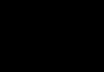

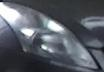

-1

In [ ]:
.
img = cv2.imread("crop/1083.jpg")
#img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

light_white = (0, 0, 200)
dark_white = (145, 60, 255)
mask_white = cv2.inRange(img, light_white, dark_white)

cv2_imshow(mask_white)
cv2_imshow(img)
cv2.waitKey(0)
# Compare the percentage of white values
#rate_white = np.count_nonzero(mask_white)



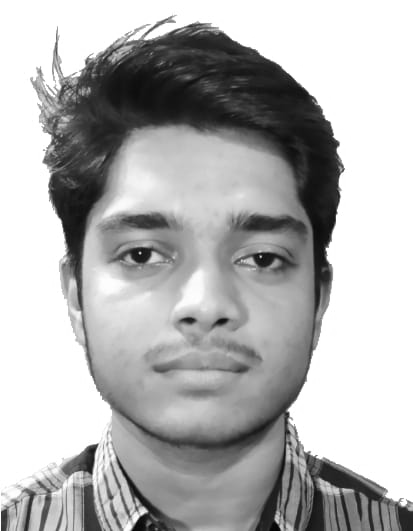

In [4]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Raman.jpeg')

raman = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(raman)